In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn import metrics
from sqlalchemy import create_engine
import warnings
warnings.filterwarnings("ignore")

In [40]:
heart_disease = pd.read_csv('C:/Users/chowd/OneDrive/Desktop/Datasets/heart.xls')

In [41]:
# Replace missing values  (marked by '?') with a '0'
X= X.replace(to_replace = '?', value =0)
# Binarize 'y' so that '1' means heary disease diagnosis and '0' means no diagnosis
y= np.where(y>0,1,0)

In [42]:
# Making sure the number of rows divide evenly into 4 samples:
rows = heart_disease.shape[0]-heart_disease.shape[0]%2
df = heart_disease.iloc[:rows,:]
# Break into a set of features and a variable for the known outcome.
X = df.iloc[:,:13]
y= df.iloc[:,13]
# Replace some random string values
X = X.replace(to_replace='?', value = 0)
# Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis
y = np.where(y>0,1,0)
# Normalize
X_std = StandardScaler().fit_transform(X)
# Data frame to store features and predicted cluster memberships
ypred = pd.DataFrame()
# Create the 2 feature PCA for graphing purposes
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)
# Split the data into 4 equally-sized samples. First we break it in hlf:
X_half1,X_half2,X_pcahalf1,X_pcahalf2=train_test_split(X_std,X_pca,test_size=0.5,random_state=123)
# Pass a list of tuples and a counter that increments each time we go
# through the loop. The tuples are the data to be used by k-means,
# and the PCA-derived features for graphing. We use k-means to fit a
# model to the data, then store the predicted values and the two-feature
# PCA solution in the data frame.
for counter, data in enumerate([
    (X_half1, X_pcahalf1),
    (X_half2, X_pcahalf2)]):
    
    # Put the features into ypred.
    ypred['pca_f1' + '_sample' + str(counter)] = data[1][:, 0]
    ypred['pca_f2' + '_sample' + str(counter)] = data[1][:, 1]
    
    # Generate cluster predictions and store them for clusters 2 to 4.
    for nclust in range(2, 5):
        pred = KMeans(n_clusters=nclust, random_state=123).fit_predict(data[0])
        ypred['clust' + str(nclust) + '_sample' + str(counter)] = pred

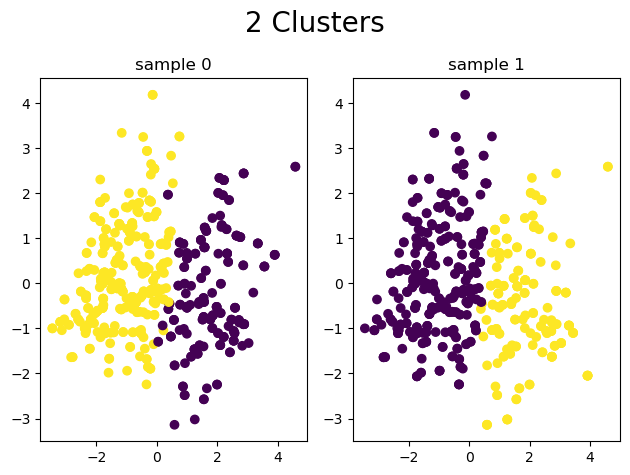

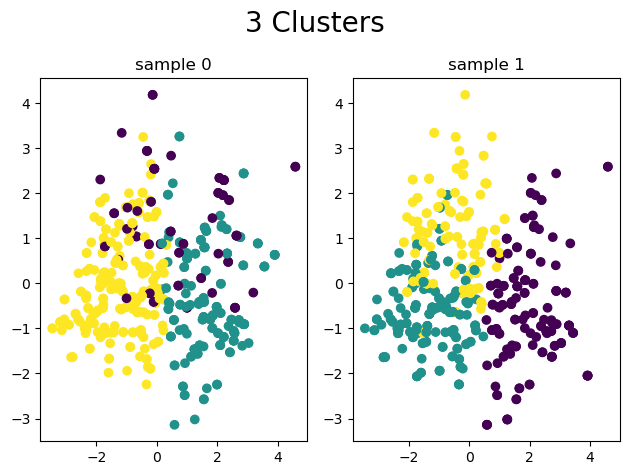

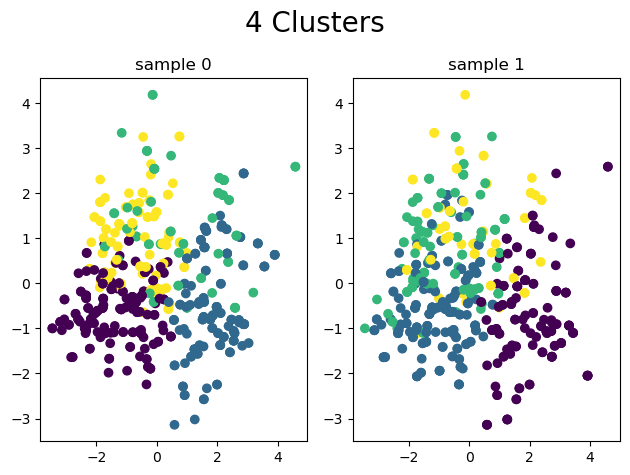

In [43]:
# For each  number of clusters, plot the clusters using the
# pca features for each sample.
for cluster in range(2, 5):
    
    # Make a grid of subplots.
    f, axarr = plt.subplots(1, 2)
    
    # Make a plot for each sample.
    for i in range(2):
        
        # PCA-created features.
        x_sub = ypred['pca_f1_sample{}'.format(i)]
        y_sub = ypred['pca_f2_sample{}'.format(i)]
        
        # Cluster assignments.
        c = ypred['clust{}_sample{}'.format(cluster, i)]
        
        # Assign the subplot to its place on the grid.
        axarr[i].scatter(x_sub, y_sub, c=c)
        axarr[i].set_title('sample {}'.format(i))
        axarr[i].set_xlim()
        axarr[i].set_ylim()
    
    # Space out the plots so that the headings don't overlap axis values.
    plt.suptitle('{} Clusters'.format(cluster), fontsize=20)
    plt.tight_layout()
    plt.show()

In [44]:
# The 2 cluster solution seems to be the only consistent solution among all.

In [45]:
pred_2 = KMeans(n_clusters=2, random_state=123).fit_predict(X_std)
pred_3 = KMeans(n_clusters=3, random_state=123).fit_predict(X_std)
pred_4 = KMeans(n_clusters=4, random_state=123).fit_predict(X_std)

print("ARI for two cluster k-means: {}".format(
    metrics.adjusted_rand_score(y, pred_2)))
print("ARI for three cluster k-means: {}".format(
    metrics.adjusted_rand_score(y, pred_3)))
print("ARI for four cluster k-means: {}".format(
    metrics.adjusted_rand_score(y, pred_4)))

ARI for two cluster k-means: 0.36362056026710177
ARI for three cluster k-means: 0.2571117596341227
ARI for four cluster k-means: 0.16263579133470196


In [46]:
# According to the results, the best solution is the 2 cluster solutions as it's ARI score is the highest.

In [47]:
pred_2 = KMeans(n_clusters=2, random_state=123).fit_predict(X_std)
pred_3 = KMeans(n_clusters=3, random_state=123).fit_predict(X_std)
pred_4 = KMeans(n_clusters=4, random_state=123).fit_predict(X_std)

print("Silhouette score for two cluster k-means: {}".format(
    metrics.silhouette_score(X_std, pred_2, metric='euclidean')))
print("Silhouette score for three cluster k-means: {}".format(
    metrics.silhouette_score(X_std, pred_3, metric='euclidean')))
print("Silhouette score for four cluster k-means: {}".format(
    metrics.silhouette_score(X_std, pred_4, metric='euclidean')))

Silhouette score for two cluster k-means: 0.1703128772507603
Silhouette score for three cluster k-means: 0.12297633440444045
Silhouette score for four cluster k-means: 0.13221308240639074
